In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
orders = pd.read_excel('Retail_dataset.xlsx', sheet_name="orders")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [5]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders.shape


(99441, 7)

In [7]:
# Are order_id unique?

orders.order_id.duplicated().sum()

0

In [8]:
# Obviously, customer_id are not unique cz one customer can order multiple items
orders.customer_id.duplicated().sum()

3345

In [9]:
orders.customer_id.value_counts().sort_values(ascending=False).head()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
Name: customer_id, dtype: int64

We are interested in successfully delivered orders only. Rest are not useful for analysis.

In [10]:
orders.order_status=='delivered'

0        True
1        True
2        True
3        True
4        True
         ... 
99436    True
99437    True
99438    True
99439    True
99440    True
Name: order_status, Length: 99441, dtype: bool

In [11]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [12]:
orders = orders[ orders.order_status=='delivered' ]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [13]:
orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [14]:
orders.shape


(96478, 7)

In [15]:
# Are there any missing values?

orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
order_purchase_timestamp          0
order_status                      0
customer_id                       0
order_id                          0
dtype: int64

In [16]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [17]:
#We'll impute the missing value for order approved timestamp by order_purchase_timestamp and order_delivered_timestamp by order_estimated_delivery_date

orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [18]:
# Are there any missing values even now?

orders.isna().sum().sort_values(ascending=False)

order_estimated_delivery_date    0
order_delivered_timestamp        0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id                      0
order_id                         0
dtype: int64

There's no null values now and we're fine to move further

In [19]:
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [20]:
order_items.shape

(112650, 6)

In [21]:
order_items.isna().sum()


order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

There's no null values in order items sheet

In [22]:
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
customers.shape


(99441, 4)

In [24]:
customers.customer_id.duplicated().sum()


3345

There are 3345 duplicate customer ID's which can be dropped

In [25]:
customers[ customers.customer_id.duplicated() ]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [26]:
customers.shape

(99441, 4)

In [27]:
customers.drop_duplicates(subset='customer_id', keep='first').shape

(96096, 4)

In [28]:
customers.shape

(99441, 4)

In [29]:
99441 - 96096

3345

In [30]:
customers.drop_duplicates(subset='customer_id', keep='first', inplace=True)
customers.shape

(96096, 4)

In [31]:
customers.customer_id.duplicated().sum()

0

In [32]:
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [33]:
payments.shape

(103886, 5)

In [34]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There's no null values in payments sheet

In [35]:
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [36]:
products.shape

(32951, 6)

In [37]:
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_width_cm           2
product_height_cm          2
product_length_cm          2
product_weight_g           2
product_id                 0
dtype: int64

In [38]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
home_comfort_2                           1
security_and_services                    1
diapers_and_hygiene                      1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [39]:
products.product_category_name.mode()

0    toys
dtype: object

In [40]:
products.product_category_name.mode()[0]

'toys'

We'll replace the null category names with the category which has highest number of items

In [41]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [42]:
products.isna().sum().sort_values(ascending=False)

product_width_cm         2
product_height_cm        2
product_length_cm        2
product_weight_g         2
product_category_name    0
product_id               0
dtype: int64

In [43]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [44]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


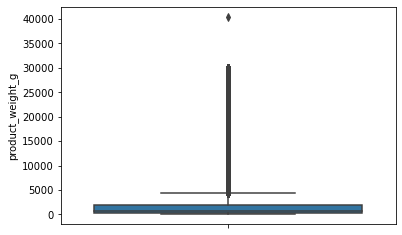

In [45]:
sns.boxplot(y= products.product_weight_g);

In [46]:
products.product_weight_g.median()

700.0

In [47]:
products.product_length_cm.median()

25.0

In [48]:
products.product_height_cm.median()

13.0

In [49]:
products.product_width_cm.median()

20.0

We'll replace the null values with median of length, width, height, weight.

In [50]:
products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [51]:
products.isna().sum().sort_values(ascending=False)

product_width_cm         0
product_height_cm        0
product_length_cm        0
product_weight_g         0
product_category_name    0
product_id               0
dtype: int64

The data is clean now without any null values and can be used for EDA

In [54]:
#We'll include all the dataframes in a list so that we can have all these sheet in 1 file
dflist = [ orders, order_items, customers, payments, products]

In [55]:
# We'll define an Excel writer object and the target file
Excelwriter = pd.ExcelWriter("cleaned_data.xlsx",engine="xlsxwriter")


In [56]:
#We now loop process the list of dataframes
for i, df in enumerate (dflist):
    df.to_excel(Excelwriter, sheet_name="Sheet" + str(i+1),index=False)
#And finally save the file
Excelwriter.save()